# Yelp - Analysis of Nearby Restaurants

In [1]:
import requests
import constants
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

address = '239 Los Cerritos Center, Cerritos, CA 90703'
miles = 1
restauraunt_cuisine = 'mexican'


In [2]:
# YELP API Call

In [3]:
url = 'https://api.yelp.com/v3/businesses/search'

headers = {'Authorization': 'Bearer %s' % constants.YELP_API_KEY}

search_miles = miles*1609
if search_miles > 40000:
    search_miles = 40000


params = {'location':address,
          'radius':search_miles,
          'term':restauraunt_cuisine,
          'sort_by':'distance',
          'limit':50
          }

response = requests.request("GET", url, params=params, headers=headers)

data = json.loads(response.text)['businesses']

In [4]:
df = pd.DataFrame()
for business in data:
    temp_dict = {}
    for category in business['categories']:
        if 'category' in temp_dict.keys():
            temp_dict['category'] = temp_dict['category'] + ', ' + category['alias']
        else:
            temp_dict['category'] = category['alias']

    temp_dict['name'] = business['name']
    temp_dict['review_count'] = business['review_count']
    temp_dict['rating'] = business['rating']

    if 'price' in business.keys():
        temp_dict['price'] = int(business['price'].replace('$$$$','4').replace('$$$','3').replace('$$','2').replace('$','1'))
    else:
        temp_dict['price'] = None

    df = df.append(temp_dict,ignore_index=True)

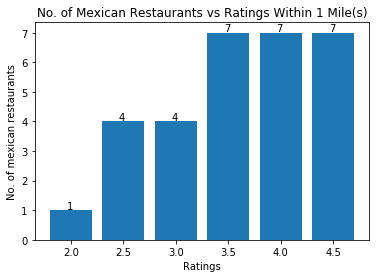

In [5]:
price_groups = df[['rating','name']].groupby(['rating'], as_index=False).count().rename(columns={'name':'count'})

plt.bar(price_groups['rating'],price_groups['count'], width=0.4)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(price_groups['count']):
    plt.text(xlocs[i] + .46, v + 0.05, str(v))
plt.xlabel("Ratings")
plt.ylabel("No. of {} restaurants".format(restauraunt_cuisine))
plt.title("No. of {} Restaurants vs Ratings Within {} Mile(s)".format(restauraunt_cuisine.capitalize(), miles))
plt.show()

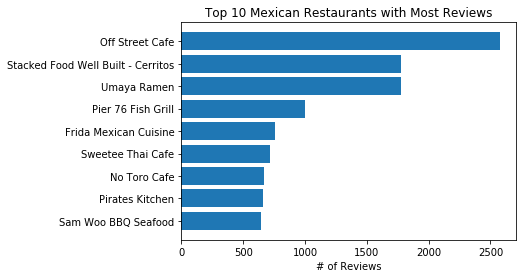

In [6]:
review_groups = df[['review_count', 'name']].sort_values(by=['review_count'], ascending=False).reset_index(drop=True)[:9]
review_groups = review_groups.sort_values(by=['review_count'], ascending=True)
plt.barh(review_groups['name'],review_groups['review_count'])
plt.title('Top 10 {} Restaurants with Most Reviews'.format(restauraunt_cuisine.capitalize()))
plt.ylabel('')
plt.xlabel('# of Reviews')
plt.show()